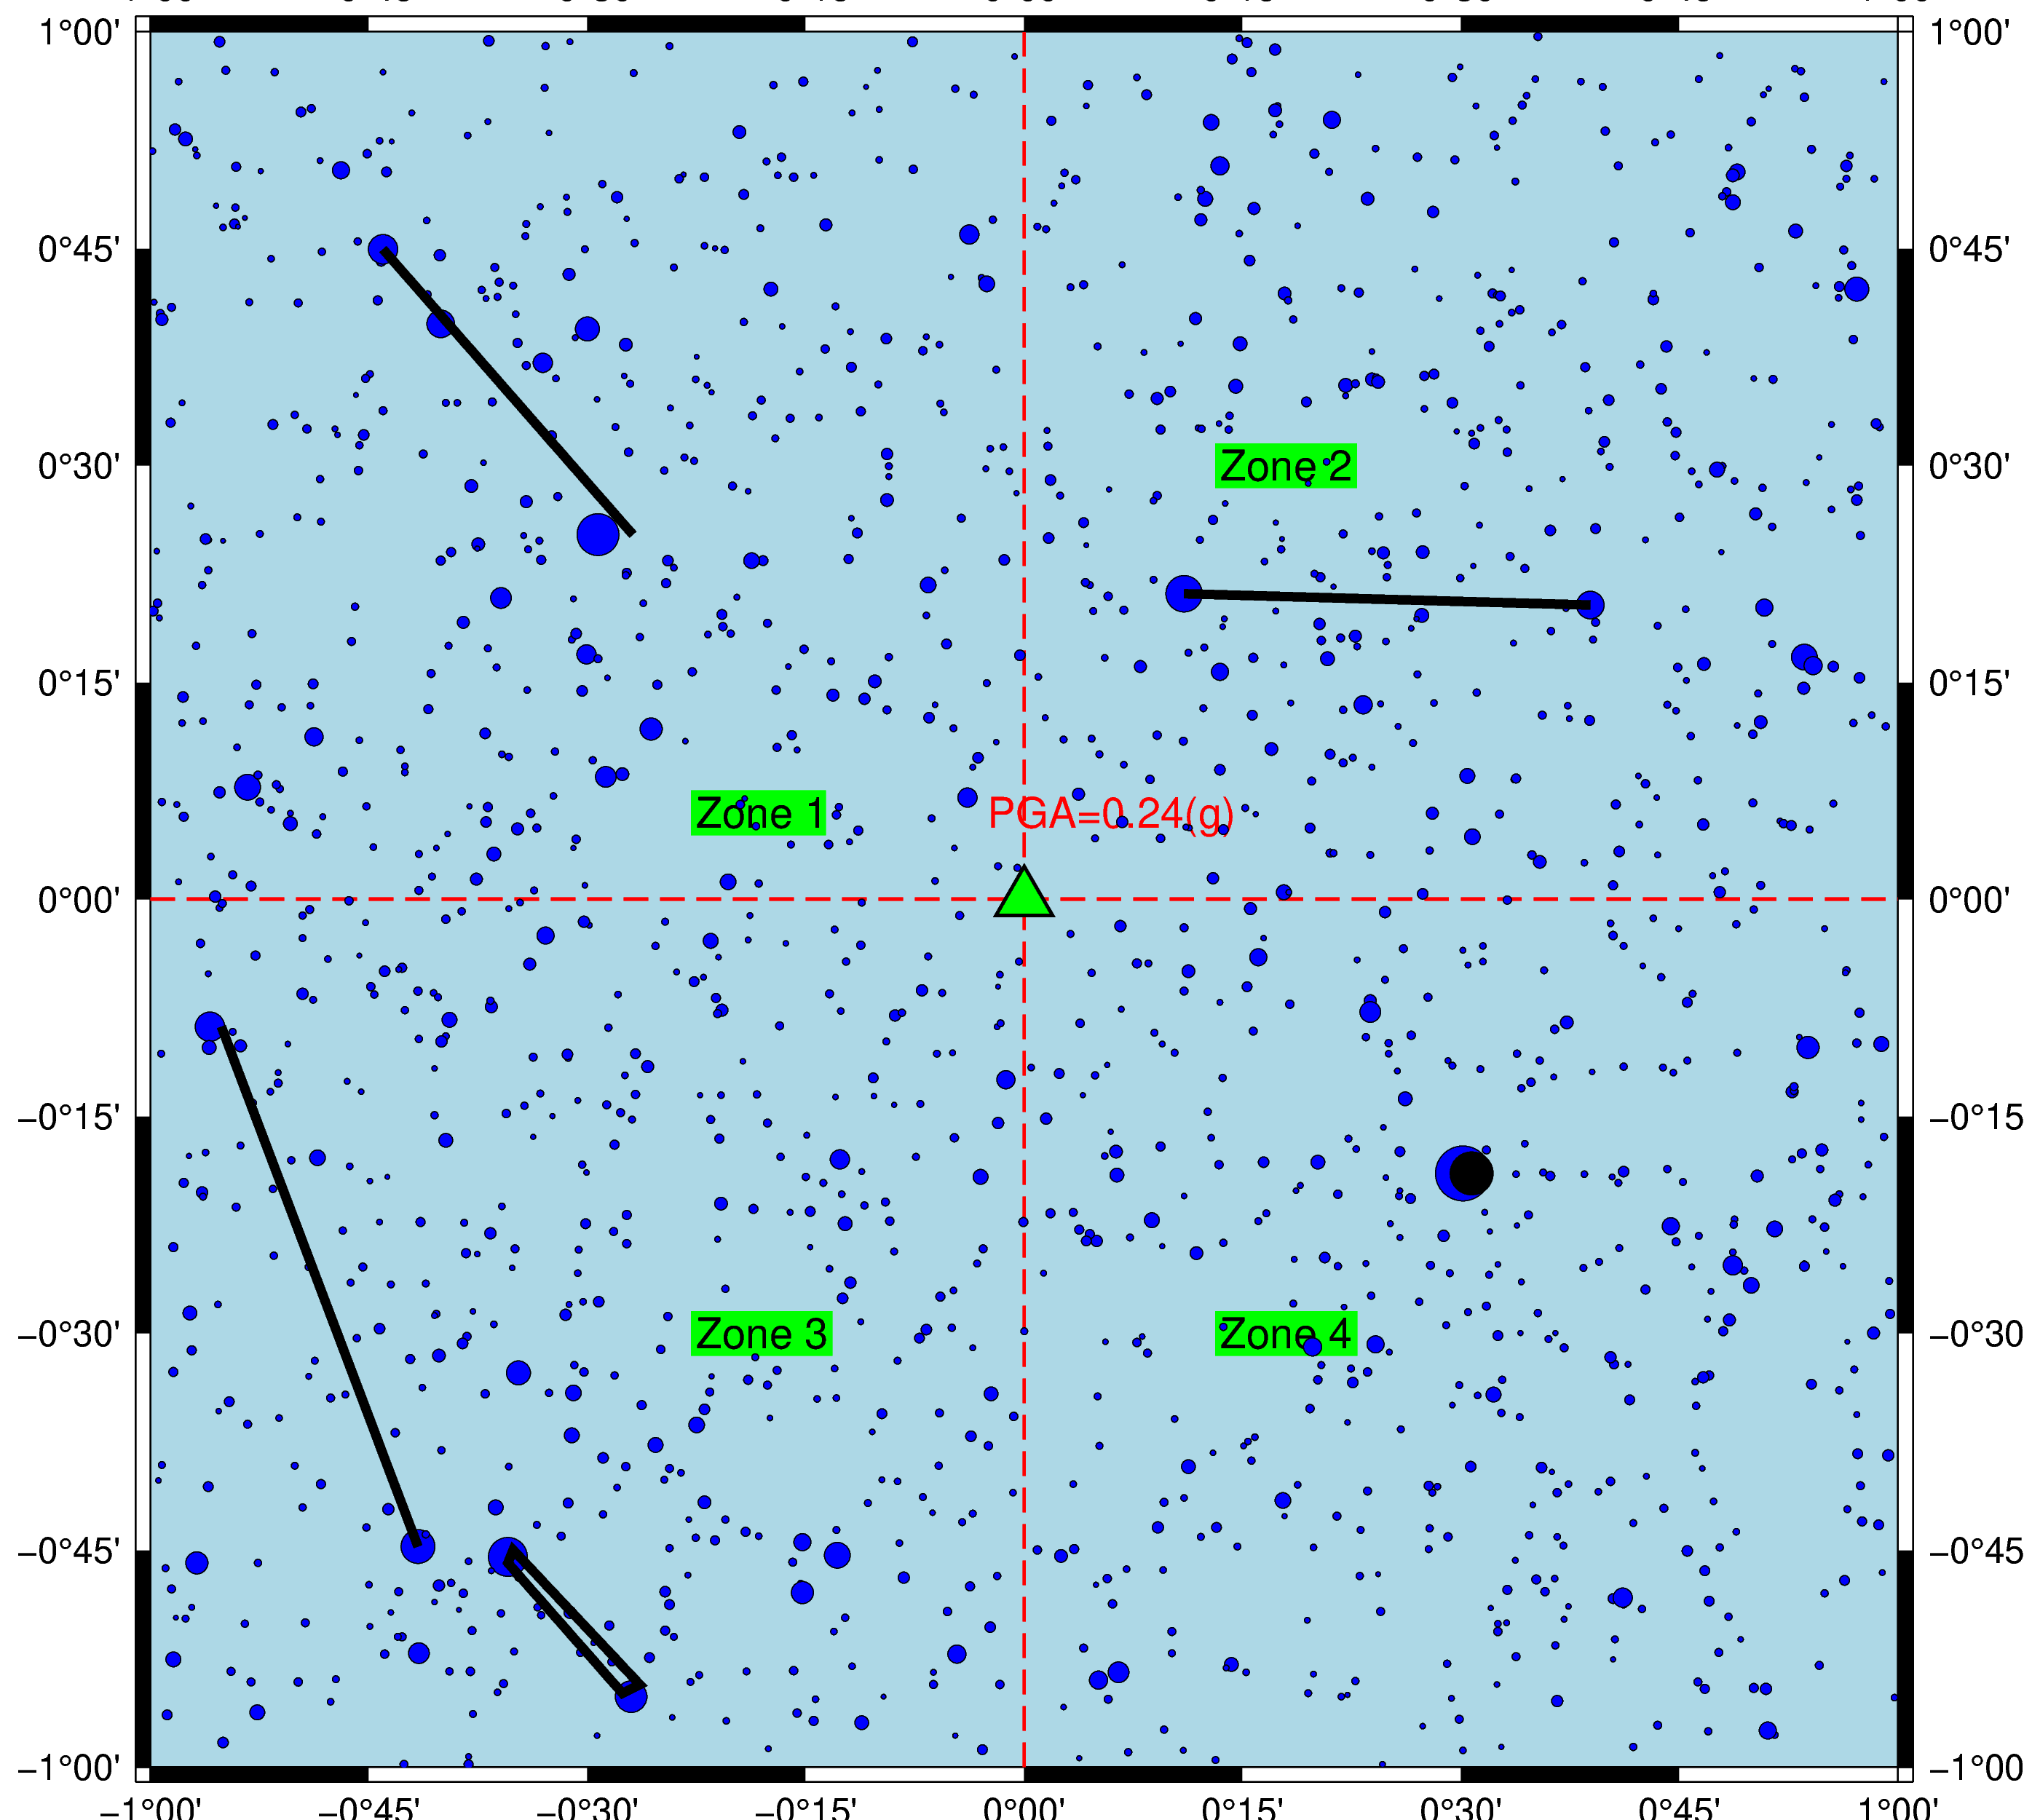

In [98]:
import os
import pygmt
import pandas as pd
# Homework assignment for PSHA by Chung Han Chan
# Read synthetic catalog to calculate the PSHA
fig = pygmt.Figure()
# config
#pygmt.config(MAP_FRAME_TYPE="plain")
#pygmt.config(FORMAT_GEO_MAP="ddd.xx")
#
cata = pd.read_csv("Syntheticcatalogue.txt",
                   delim_whitespace=True,
                   header=1,
                   names=["long","lat", "dep", "mag"])
#print(cata)
# Area
fig.coast(
    region=[-1, 1, -1, 1],
    projection="M8i",
    land="grey",
    water="lightblue",
    shorelines=True,
    resolution="f",
    frame='a'
)
# Zone separate line
fig.plot(
    x=[-1,1],
    y=[0,0],
    pen="1,red,-",
)
fig.text(text="Zone 1",x=-0.3, y=0.1, font="14p",fill='green')
fig.text(text="Zone 2",x=0.3, y=0.5, font="14p",fill='green')
fig.text(text="Zone 3",x=-0.3, y=-0.5, font="14p",fill='green')
fig.text(text="Zone 4",x=0.3, y=-0.5, font="14p",fill='green')
#
fig.plot(
    x=[0,0],
    y=[-1,1],
    pen="1,red,-",
)
# Target
fig.plot(
    x=0,
    y=0,
    style="t0.3i",
    pen='thick',
    color = "green"
)
fig.text(text="PGA=0.24(g)",x=0.1, y=0.1, font="14p,red")
# Catalog plot
fig.plot(x=cata.long,
         y=cata.lat,
         sizes=0.005*(2**cata.mag),
         style="cc",
         color="blue",
         pen="black")
# Plot the fault line
fig.plot(x=[-0.734,-0.448],y=[0.749,0.420],pen="3,black") # Zone 1
fig.plot(x=[0.648,0.183],y=[0.339,0.352],pen="3,black") # Zone 2
fig.plot(x=0.512,y=-0.316,style="c0.2i",color='black') # Zone 3
fig.plot(x=[-0.919,-0.694],y=[-0.147,-0.746],pen="3,black") # Zone 4-1
fig.plot(x=[-0.460,-0.440,-0.585,-0.591,-0.460],y=[-0.915,-0.905,-0.750,-0.765,-0.915],pen="3,black") # Zone 4-2
fig.savefig("Hazard_example.png")
fig.show()